In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import colorama

In [2]:
pm = pd.read_csv("/Users/meijiaojiao/Desktop/Evolution_algorithm/Experiment16/Experiment16/Experiment2/parameter_combinations.csv",header=0,index_col=[0])
# pm dataframe, let mutation rate times 3, and change search radius to 0.05, and gg to 0.05
pm["mutation_rate"] = pm["mutation_rate"]*3
pm["search_radius"] = 0.05
pm["gg"] = 0.05
print(colorama.Fore.GREEN+f"the shape of parameter combinations dataframe is {pm.shape}")
print(colorama.Fore.GREEN+f"there are {pm.shape[0]} parameter combinations in total")
print(colorama.Fore.GREEN+f"the parameters are as the following {pm.columns.tolist()}")
pm.to_csv("parameter_combinations.csv",header=True,index=True)

the shape of parameter combinations dataframe is (30, 17)
there are 30 parameter combinations in total
the parameters are as the following ['num_generations', 'mutation_rate', 'num_individuals', 'crossover_rate', 'mutation_type', 'crossover_type', 'local_search_rate', 'local_search_type', 'search_radius', 'threshold', 'dimensions', 'gg', 'selection_method', 'length_of_local_search', 'redo_local_search_rate', 'fitness_function', 'algorithm']


In [3]:
one = pd.read_csv("/Users/meijiaojiao/Desktop/Evolution_algorithm/Experiment16/Experiment16/Experiment2/solutions_dataframe.csv",header=0,index_col=0)
two = pd.read_csv("/Users/meijiaojiao/Desktop/Evolution_algorithm/Experiment16/Experiment16/Experiment2/solutions_dataframe1.csv",header=0,index_col=0)
three = pd.read_csv("/Users/meijiaojiao/Desktop/Evolution_algorithm/Experiment16/Experiment16/Experiment2/solutions_dataframe2.csv",header=0,index_col=0)
four = pd.read_csv("/Users/meijiaojiao/Desktop/Evolution_algorithm/Experiment16/Experiment16/Experiment2/solutions_dataframe3.csv",header=0,index_col=0)
five = pd.read_csv("/Users/meijiaojiao/Desktop/Evolution_algorithm/Experiment16/Experiment16/Experiment2/solutions_dataframe4.csv",header=0,index_col=0)
six = pd.read_csv("/Users/meijiaojiao/Desktop/Evolution_algorithm/Experiment16/Experiment16/Experiment2/solutions_dataframe5.csv",header=0,index_col=0)
solution = pd.concat([one,two,three,four,five,six],axis=0)
solution = solution.reset_index(drop=True)
print(colorama.Fore.YELLOW+f"the shape of solution is {solution.shape}")
solution.columns = ["Run"+str(i) for i in range(1,11,1)]
print(colorama.Fore.CYAN+f"the shape of solution dataframe is {solution.shape}")
print(colorama.Fore.CYAN+f"the columns of solution dataframe is the runs {solution.columns.tolist()}")
solution.to_csv("solutions_dataframe.csv",header=True,index=True)
print(solution.head(5))
solution = solution.stack()
solution = solution.rename_axis(["pm_index","Run"])
solution = solution.reset_index(name="fitness")
print(solution)

the shape of solution is (30, 10)
the shape of solution dataframe is (30, 10)
the columns of solution dataframe is the runs ['Run1', 'Run2', 'Run3', 'Run4', 'Run5', 'Run6', 'Run7', 'Run8', 'Run9', 'Run10']
          Run1         Run2         Run3         Run4         Run5  \
0   646.967373   541.082165   545.949524   571.896463   486.023219   
1  1235.742407  1978.936664  1249.571838  1763.727365  1503.232220   
2  1365.066199  1579.163483  1260.285229  1721.586219  1588.398126   
3   -10.153200    -5.100772   -10.153200   -10.153200   -10.153200   
4    -5.100772    -2.682860   -10.153199   -10.153199    -2.682860   

          Run6         Run7         Run8         Run9        Run10  
0   654.314107  1764.370478   635.571540   457.294355   484.786044  
1  1173.941895  1581.046440  1900.479056  1553.931645  1727.539282  
2  2218.017376  1583.529781  1299.338861  1624.272366  1401.473914  
3    -2.630472   -10.153200    -2.682860   -10.153200   -10.153200  
4   -10.153200   -10.153198 

In [4]:
# combine the two dataframes
# pm is the parameter combinations dataframe
# solution is the solutions dataframe
# according to pm_index to combine the two dataframes
pm["pm_index"] = [i for i in range(0,pm.shape[0])]
df = pd.merge(pm,solution,on="pm_index")
print(colorama.Fore.RED+f"the shape of df is {df.shape}")
print(df)

the shape of df is (300, 20)
     num_generations  mutation_rate  num_individuals  crossover_rate  \
0            1000000           0.06              200             0.5   
1            1000000           0.06              200             0.5   
2            1000000           0.06              200             0.5   
3            1000000           0.06              200             0.5   
4            1000000           0.06              200             0.5   
..               ...            ...              ...             ...   
295          1000000           0.06              100             0.7   
296          1000000           0.06              100             0.7   
297          1000000           0.06              100             0.7   
298          1000000           0.06              100             0.7   
299          1000000           0.06              100             0.7   

    mutation_type           crossover_type  local_search_rate  \
0          Normal  Probabilistic_crossove

In [5]:
function_list = df["fitness_function"].unique().tolist()
dimensions_list = df["dimensions"].unique().tolist()
mutation_rate_list = df["mutation_rate"].unique().tolist()
cross_rate_list = df["crossover_rate"].unique().tolist()
mutation_type_list = df["mutation_type"].unique().tolist()
crossover_type_list = df["crossover_type"].unique().tolist()
local_search_rate_list = df["local_search_rate"].unique().tolist()
local_search_type_list = df["local_search_type"].unique().tolist()
search_radius_list = df["search_radius"].unique().tolist()
gg_list = df["gg"].unique().tolist()
selection_method_list = df["selection_method"].unique().tolist()
redo_local_search_rate_list = df["redo_local_search_rate"].unique().tolist()
length_of_local_search_list = df["length_of_local_search"].unique().tolist()
algorithm_list = df["algorithm"].unique().tolist()
# get all the unique values of these parameters
print(colorama.Fore.BLUE+f"the functions are {function_list}")
print(colorama.Fore.BLUE+f"the dimensions are {dimensions_list}")
print(colorama.Fore.BLUE+f"the mutation_rate are {mutation_rate_list}")
print(colorama.Fore.BLUE+f"the cross_rate are {cross_rate_list}")
print(colorama.Fore.BLUE+f"the mutation_type are {mutation_type_list}")
print(colorama.Fore.BLUE+f"the crossover_type are {crossover_type_list}")
print(colorama.Fore.BLUE+f"the local_search_rate are {local_search_rate_list}")
print(colorama.Fore.BLUE+f"the local_search_type are {local_search_type_list}")
print(colorama.Fore.BLUE+f"the search_radius are {search_radius_list}")
print(colorama.Fore.BLUE+f"the gg are {gg_list}")
print(colorama.Fore.BLUE+f"the redo_local_search_rate are {redo_local_search_rate_list}")
print(colorama.Fore.BLUE+f"the length_of_local_search are {length_of_local_search_list}")
print(colorama.Fore.BLUE+f"the selection_method are {selection_method_list}")
print(colorama.Fore.BLUE+f"the algorithm are {algorithm_list}")

the functions are [5, 21]
the dimensions are [100]
the mutation_rate are [0.06, 0.03]
the cross_rate are [0.5, 0.6, 0.7]
the mutation_type are ['Normal']
the crossover_type are ['Probabilistic_crossover']
the local_search_rate are [0.5]
the local_search_type are ['Uniform']
the search_radius are [0.05]
the gg are [0.05]
the redo_local_search_rate are [0]
the length_of_local_search are [4]
the selection_method are ['sorted_selection_part']
the algorithm are ['Baseline', 'Lamarck', 'Baldwin']


In [6]:
df.to_csv("df.csv",header=True,index=True)

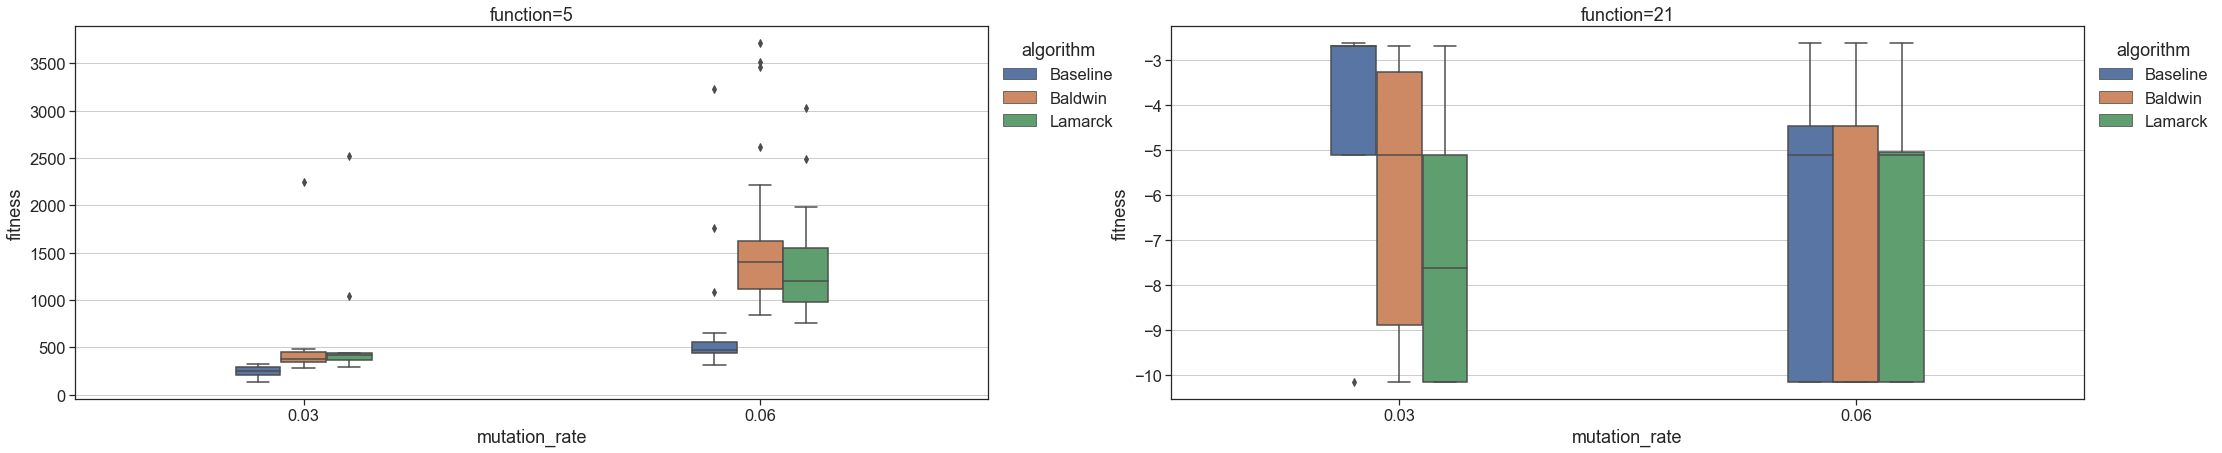

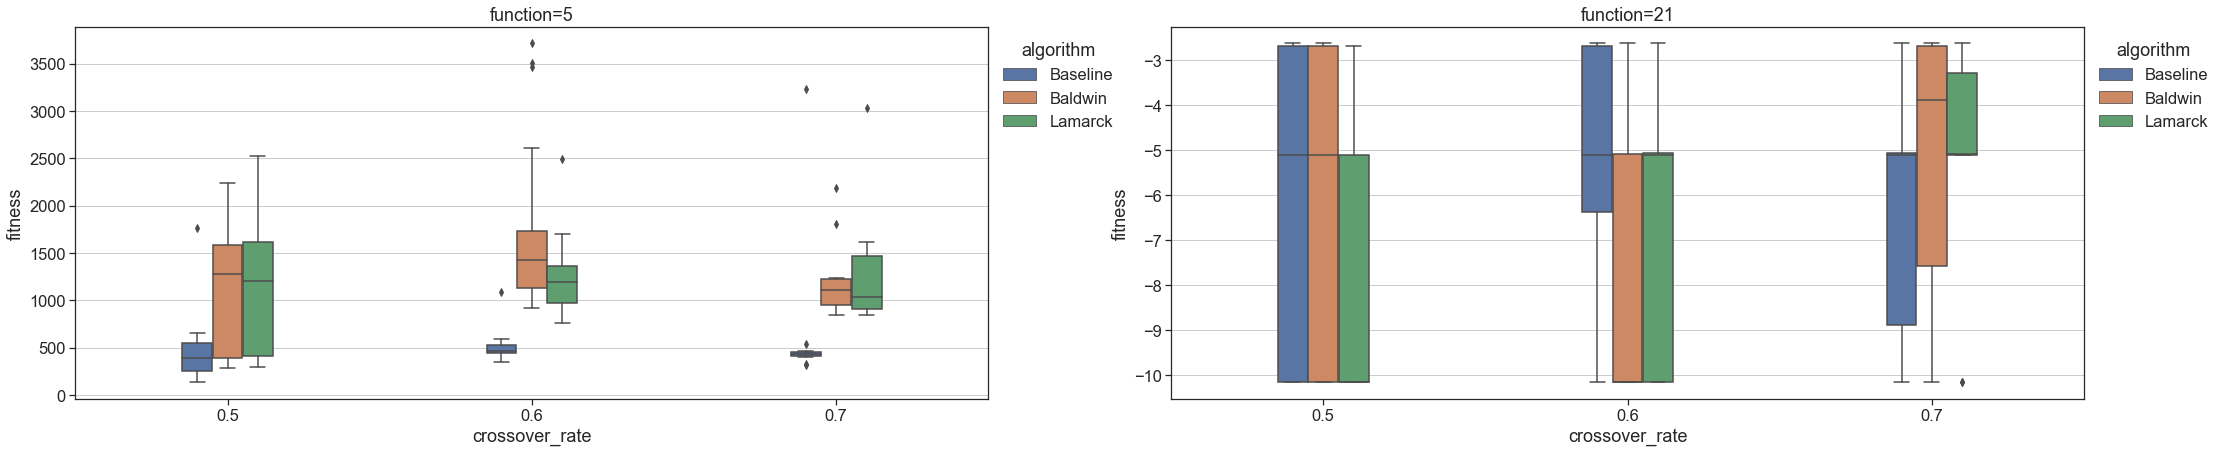

In [8]:
def show_graph(dataframe,xp):
    sns.set_theme(style="whitegrid",font_scale=1.5)
    sns.set_style("ticks",{'axes.grid' : True})
    dist_cols = 2
    dist_rows = 6
    plt.figure(figsize=(18 * dist_cols, 8 * dist_rows))
    i = 1
    for func in function_list:
        data = dataframe[dataframe["fitness_function"] == func]
        plt.subplot(dist_rows, dist_cols, i)
        ax = sns.boxplot(data=data, y="fitness",x=xp,hue="algorithm",hue_order=["Baseline","Baldwin","Lamarck"],width=0.3)
        sns.move_legend(ax, "upper left", bbox_to_anchor=(1,1),frameon=False)
        plt.title(f"function={func}")
        i = i + 1
    plt.savefig(f"{xp}_exp2.png", dpi=400,bbox_inches='tight')
    plt.show()
xp_list=['mutation_rate','crossover_rate']
for i in xp_list:
    show_graph(dataframe=df,xp=i)

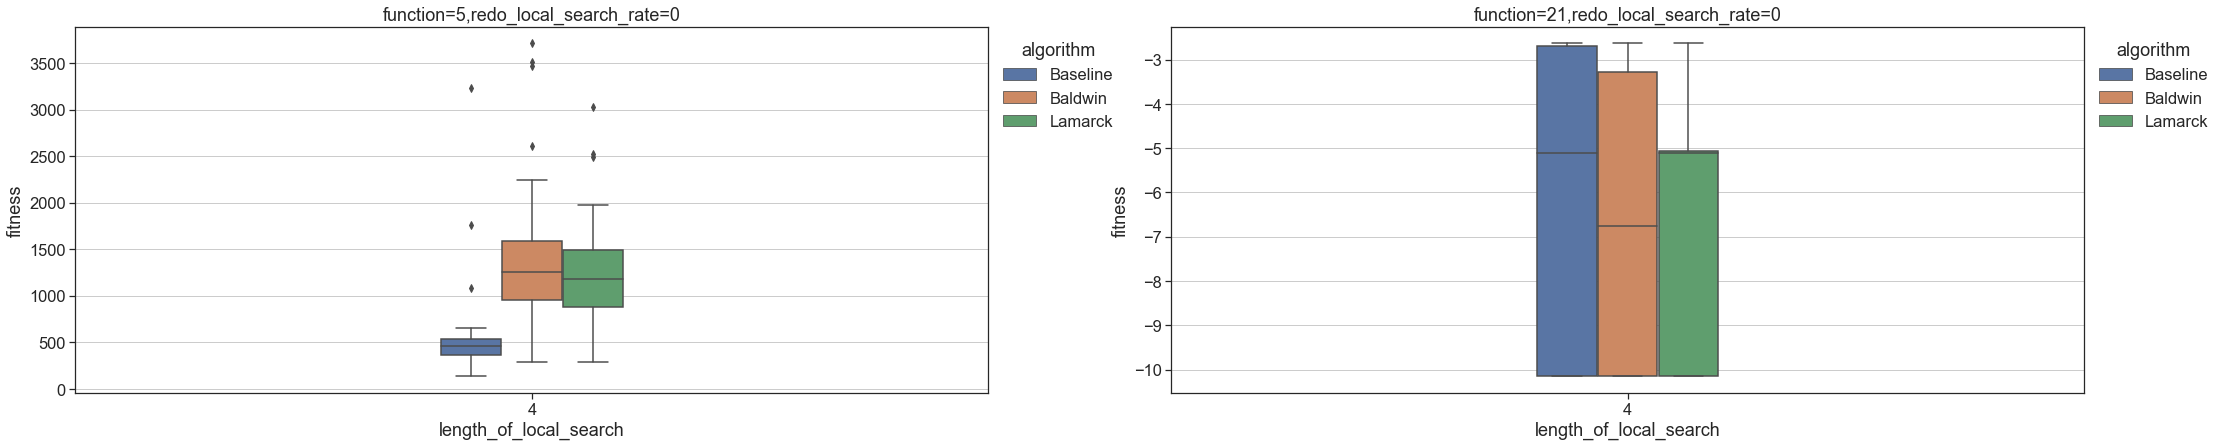

In [9]:
 def show_graph(dataframe,xp):
    rate = xp[0]
    tp = xp[1]
    sns.set_theme(style="whitegrid",font_scale=1.5)
    sns.set_style("ticks",{'axes.grid' : True})
    dist_cols = 2
    dist_rows = 15
    plt.figure(figsize=(18 * dist_cols, 8 * dist_rows))
    i = 1
    for func in function_list:
        for w in redo_local_search_rate_list:
            data = dataframe[dataframe["fitness_function"] == func]
            data = data[data[rate] == w]
            plt.subplot(dist_rows, dist_cols, i)
            ax = sns.boxplot(data=data, y="fitness",x=tp,hue="algorithm",hue_order=["Baseline","Baldwin","Lamarck"],width=0.2)
            sns.move_legend(ax, "upper left", bbox_to_anchor=(1,1),frameon=False)
            plt.title(f"function={func},{rate}={w}")
            i = i + 1
    plt.savefig(f"{tp}combine_exp2.png", dpi=400,bbox_inches='tight')
    plt.show()
xp_list=[["redo_local_search_rate","length_of_local_search"]]
for i in xp_list:
    show_graph(dataframe=df,xp=i)